In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import matplotlib.pyplot as plt
import sys
import os
import time


Using TensorFlow backend.


In [15]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [16]:
output_id = int(time.time())
os.mkdir(f'./model_training/{output_id}')
output_file_name = f'./model_training/{output_id}/output.txt'
output_file = open(output_file_name, 'w+')
orig_stdout = sys.stdout
sys.stdout = output_file

In [17]:
model.summary()

In [18]:
train_datagen = image.ImageDataGenerator(
    rotation_range = 30,
    zoom_range = 0.15,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.15,
    rescale = 1./255,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

test_datagen = image.ImageDataGenerator(rescale = 1./255)

In [20]:
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size = (224,224),
    batch_size = 12,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    'test',
    target_size = (224,224),
    batch_size = 12,
    class_mode = 'binary'
)

In [21]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 2,
)

In [22]:
sys.stdout = orig_stdout
output_file.close()

In [23]:
loss_png_file = open(f'./model_training/{output_id}/loss.png', 'w')
sys.stdout = loss_png_file

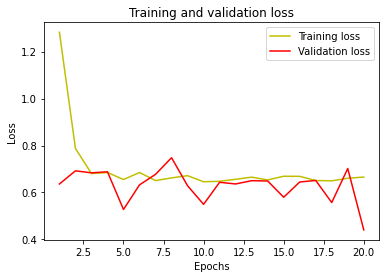

In [24]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(sys.stdout.buffer)

In [25]:
loss_png_file.close()
sys.stdout = orig_stdout

In [26]:
acc_png_file = open(f'./model_training/{output_id}/accuracy.png', 'w')
sys.stdout = acc_png_file

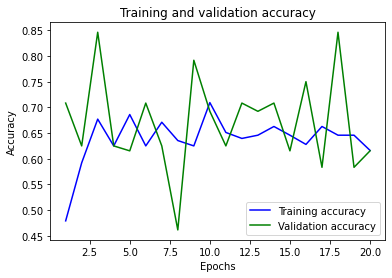

In [27]:
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'blue', label='Training accuracy')
plt.plot(epochs, val_acc, 'green', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(sys.stdout.buffer)


In [28]:
acc_png_file.close()
sys.stdout = orig_stdout

In [17]:
model.save('covid_cnn.h5py')